In [6]:
import spikeinterface.full as si
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from P2_PostProcess.VirtualReality.spatial_information import calculate_spatial_information
from P2_PostProcess.VirtualReality.field_detection import detect_fields, plot_rate_map_relative_to_field, plot_all_rate_map_relative_to_field,  plot_all_interfield_distances


SyntaxError: invalid syntax (2891071146.py, line 7)

In [2]:
def get_data(vr_session_base_names, of_session_base_names):
    project_path = "/mnt/datastore/Harry/Cohort11_april2024/derivatives/"
    # get sorting analyzer and unit locations 
    master_data = pd.DataFrame() 
    for vr_name, of_name in zip(vr_session_base_names, of_session_base_names):
        mouse = vr_name.split("_")[0]
        day = vr_name.split("_")[1]
        vr_path = f"{project_path}{mouse}/{day}/vr/{vr_name}/processed/kilosort4/spikes.pkl"
        of_path = f"{project_path}{mouse}/{day}/of/{of_name}/processed/kilosort4/spikes.pkl"
        sorting_analyzer_path = f"{project_path}{mouse}/{day}/ephys/sorting_analyzer"
        spike_data_vr = pd.read_pickle(vr_path); spike_data_vr["firing_times_vr"] = spike_data_vr["firing_times"]
        spike_data_of = pd.read_pickle(of_path)
        spike_data = pd.merge(spike_data_vr, spike_data_of, on="cluster_id")

        sorting_analyzer = si.load_sorting_analyzer(sorting_analyzer_path)
        ulc = sorting_analyzer.get_extension("unit_locations")
        unit_locations = ulc.get_data(outputs="by_unit")
        spike_data['unit_location_x'] = (spike_data.index.map(lambda unit: unit_locations[unit][0])*-1)
        spike_data['unit_location_y'] = spike_data.index.map(lambda unit: unit_locations[unit][1])
        spike_data['unit_location_z'] = spike_data.index.map(lambda unit: unit_locations[unit][2])
        
        position_path = f"{project_path}{mouse}/{day}/vr/{vr_name}/processed/position_data.csv"
        processed_position_path = f"{project_path}{mouse}/{day}/vr/{vr_name}/processed/processed_position_data.pkl"
        position_data = pd.read_csv(position_path)
        processed_position_data = pd.read_pickle(processed_position_path)
        spike_data = calculate_spatial_information(spike_data, position_data, track_length=200)
        spike_data = spike_data.sort_values(by=["spatial_information_score_Isec"], ascending=False)

        # auto curate
        spike_data = spike_data[(spike_data["snr_x"] > 1) & 
                                (spike_data["mean_firing_rate_x"] > 0.5) & 
                                (spike_data["rp_contamination_x"] < 0.9)]
        master_data = pd.concat([master_data, spike_data], ignore_index=True)
    return master_data 

##### import M21 D26 (the day with abundant grid cells) data and plot the rate maps relative to the fields and reordered by the interfield distance. Here we can look at the distribution of the interfield distance.

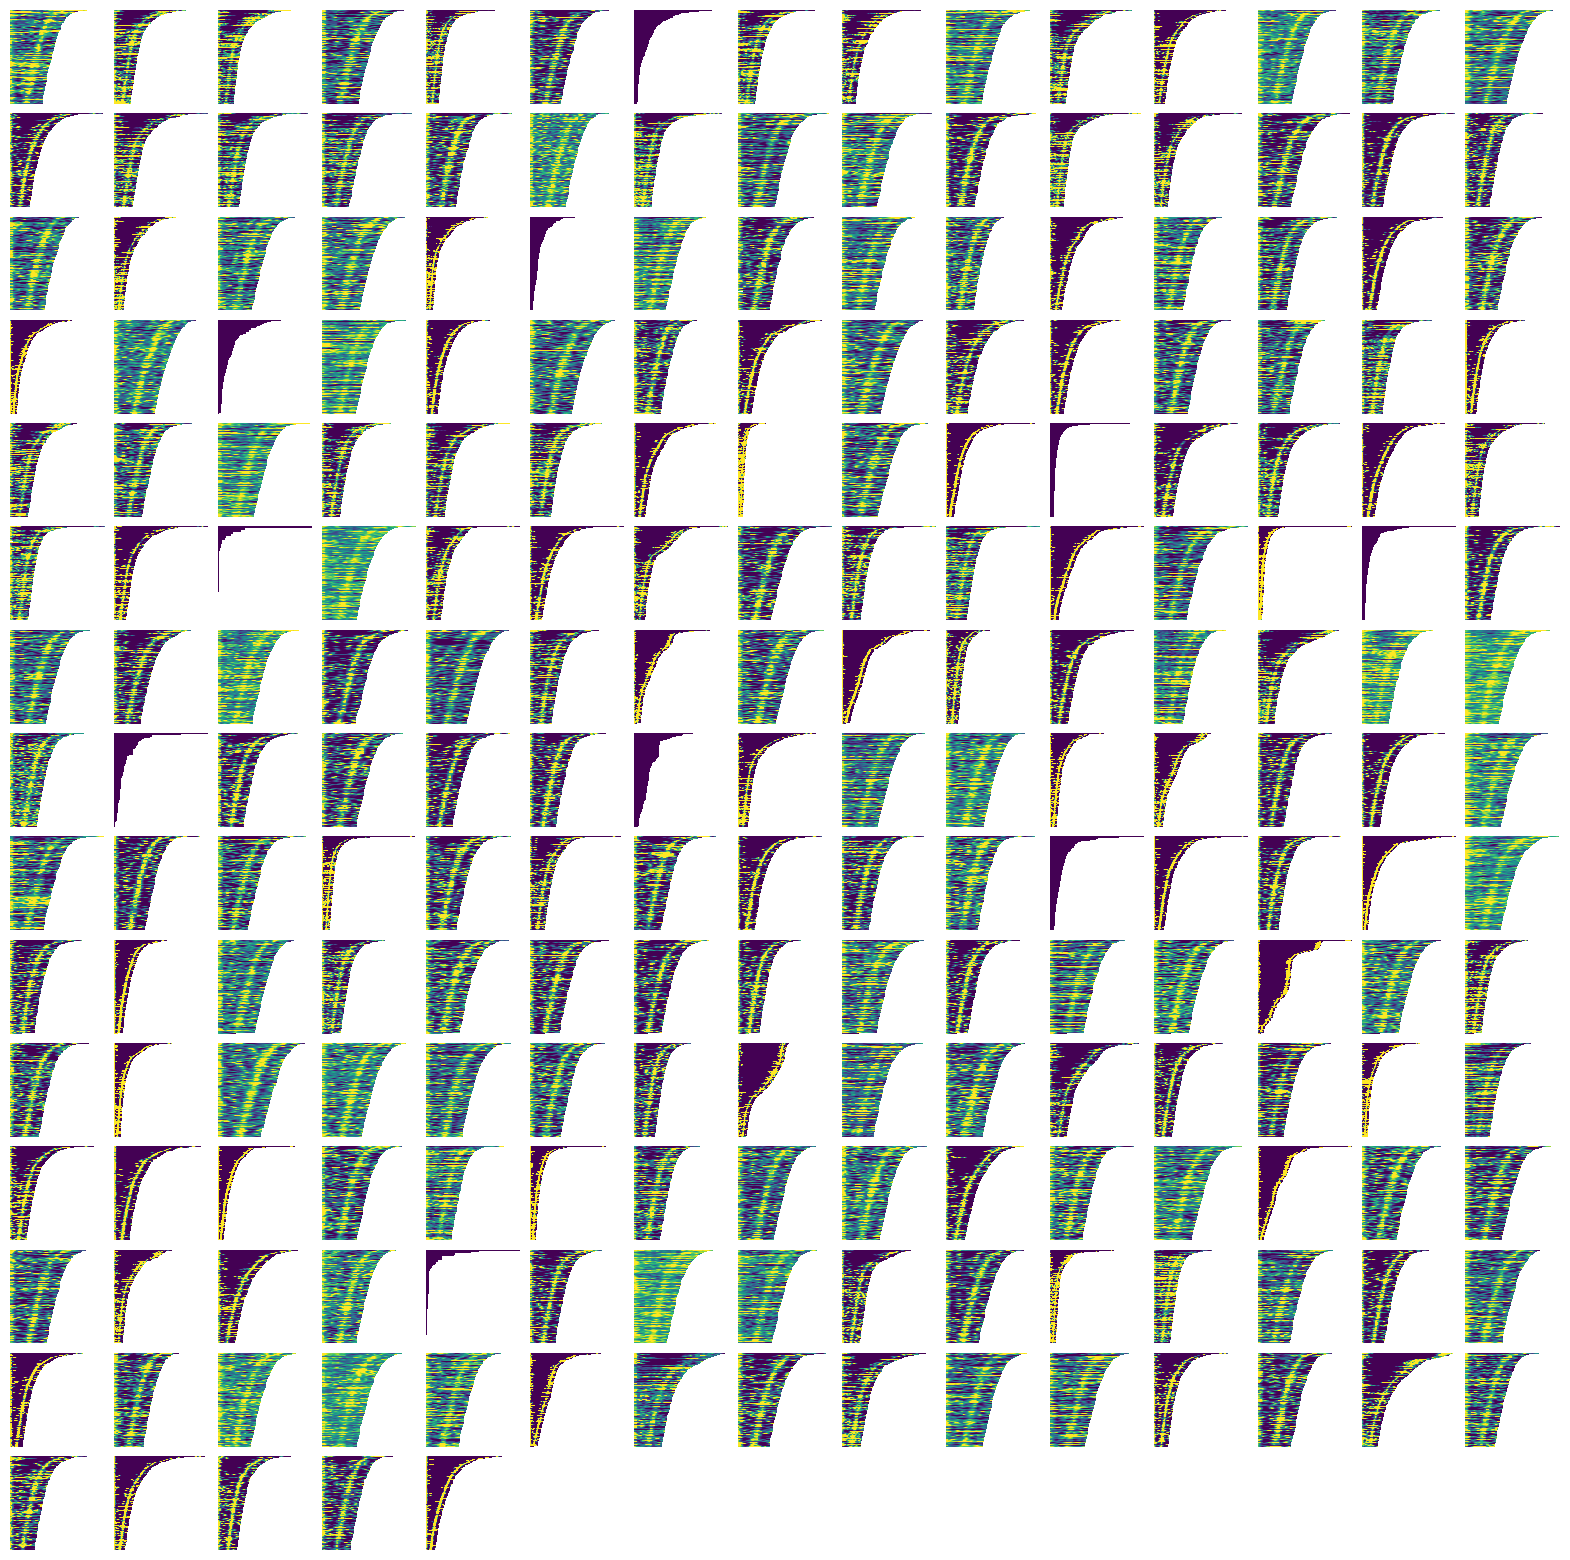

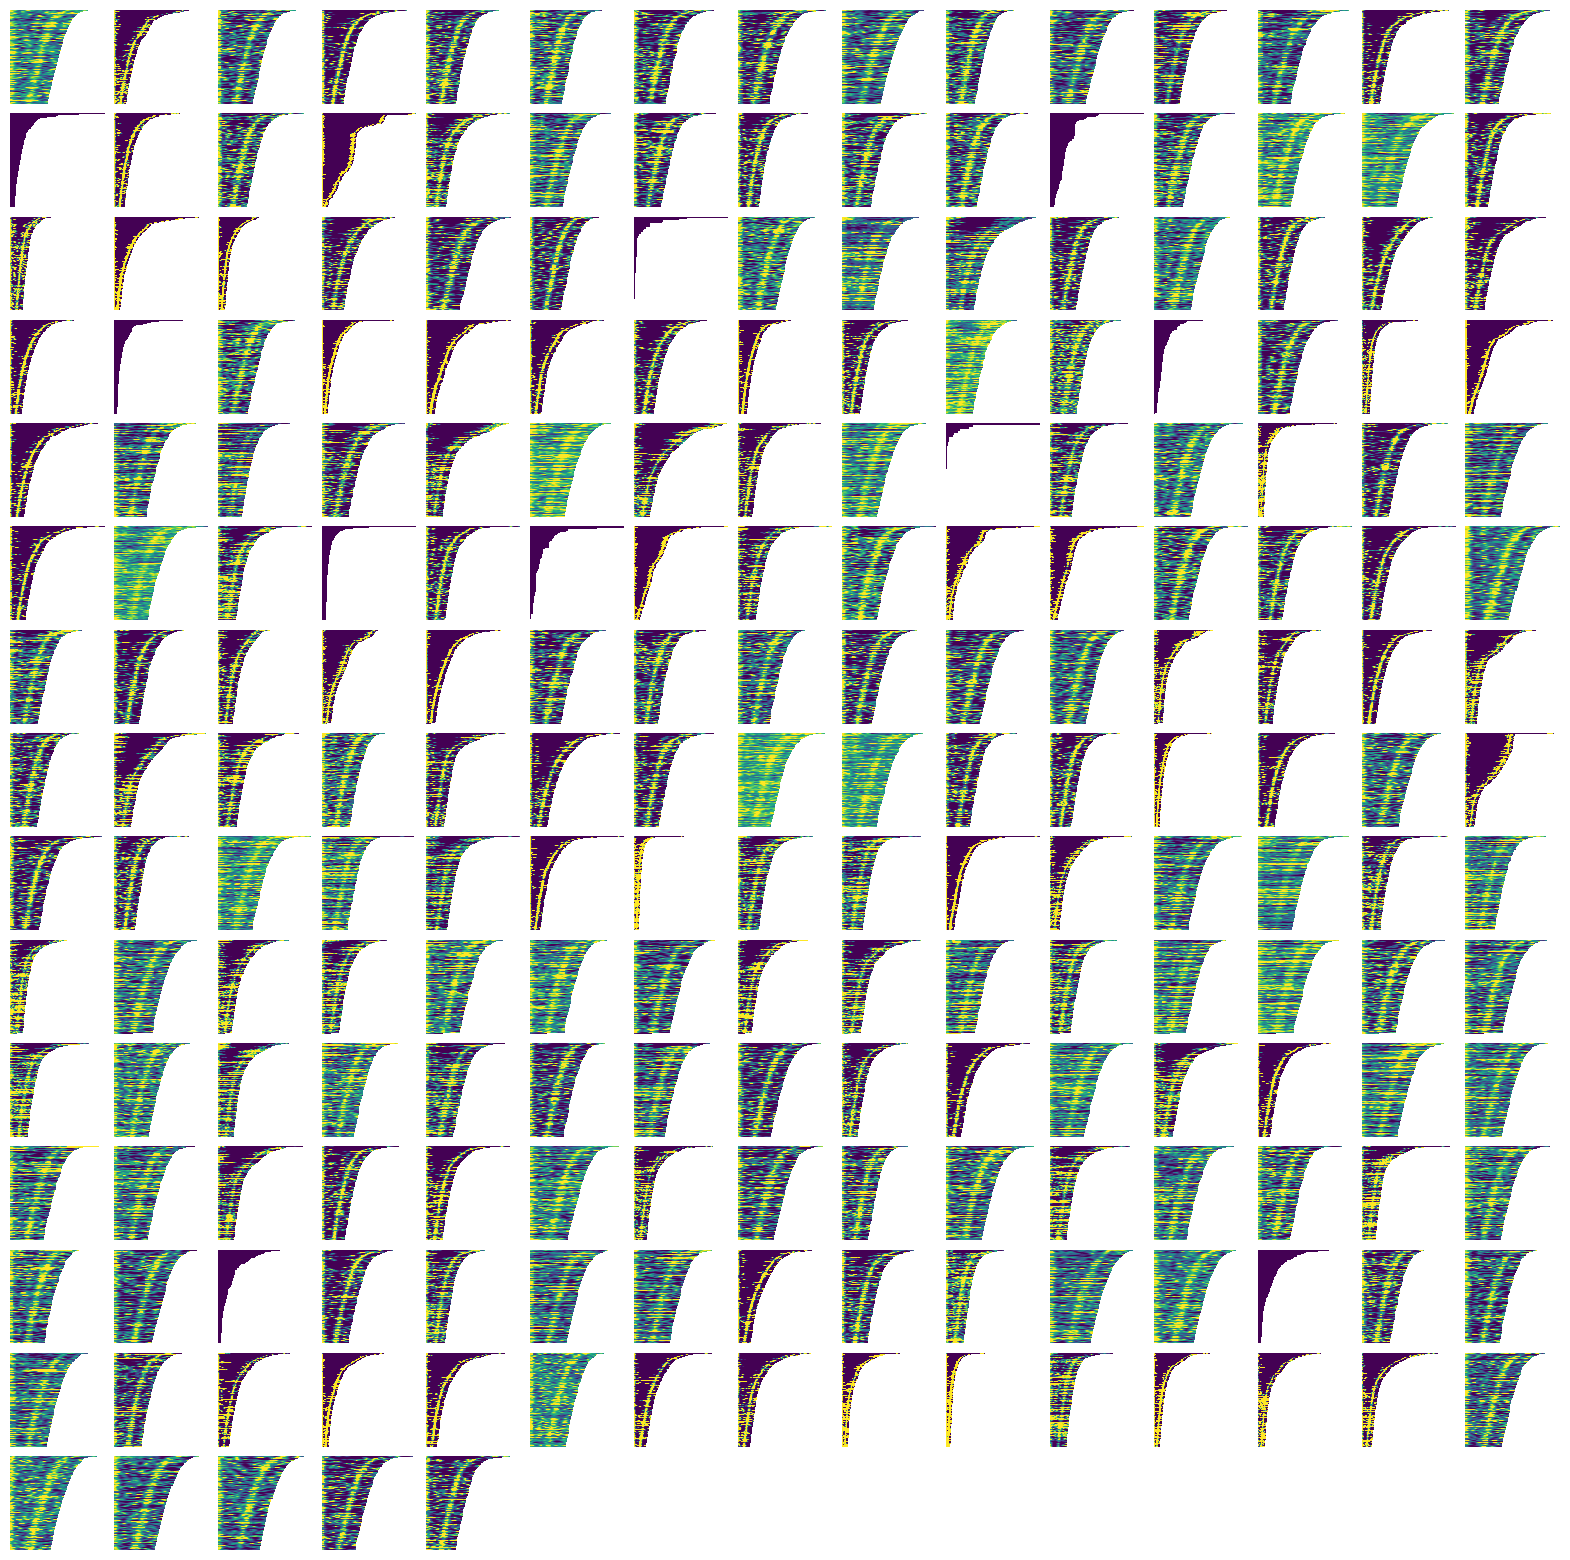

In [3]:
of_session_base_names = ["M21_D26_2024-05-28_16-35-31_OF1"]
vr_session_base_names = ["M21_D26_2024-05-28_17-04-41_VR1"]
spike_data = get_data(vr_session_base_names, of_session_base_names)
col = "grid_score"
spike_data = spike_data.sort_values(by=[col], ascending=False)
#plot_rate_map_relative_to_field(spike_data, reorder=True)
plot_all_rate_map_relative_to_field(spike_data, reorder=True)
plot_all_interfield_distances(spike_data, reorder=True)


col = "unit_location_y"
spike_data = spike_data.sort_values(by=[col], ascending=False)
#plot_rate_map_relative_to_field(spike_data, reorder=True)
plot_all_rate_map_relative_to_field(spike_data, reorder=True)

##### import M20 D25 (the day with abundant grid cells) data and plot the rate maps relative to the fields and reordered by the interfield distance. Here we can look at the distribution of the interfield distance.

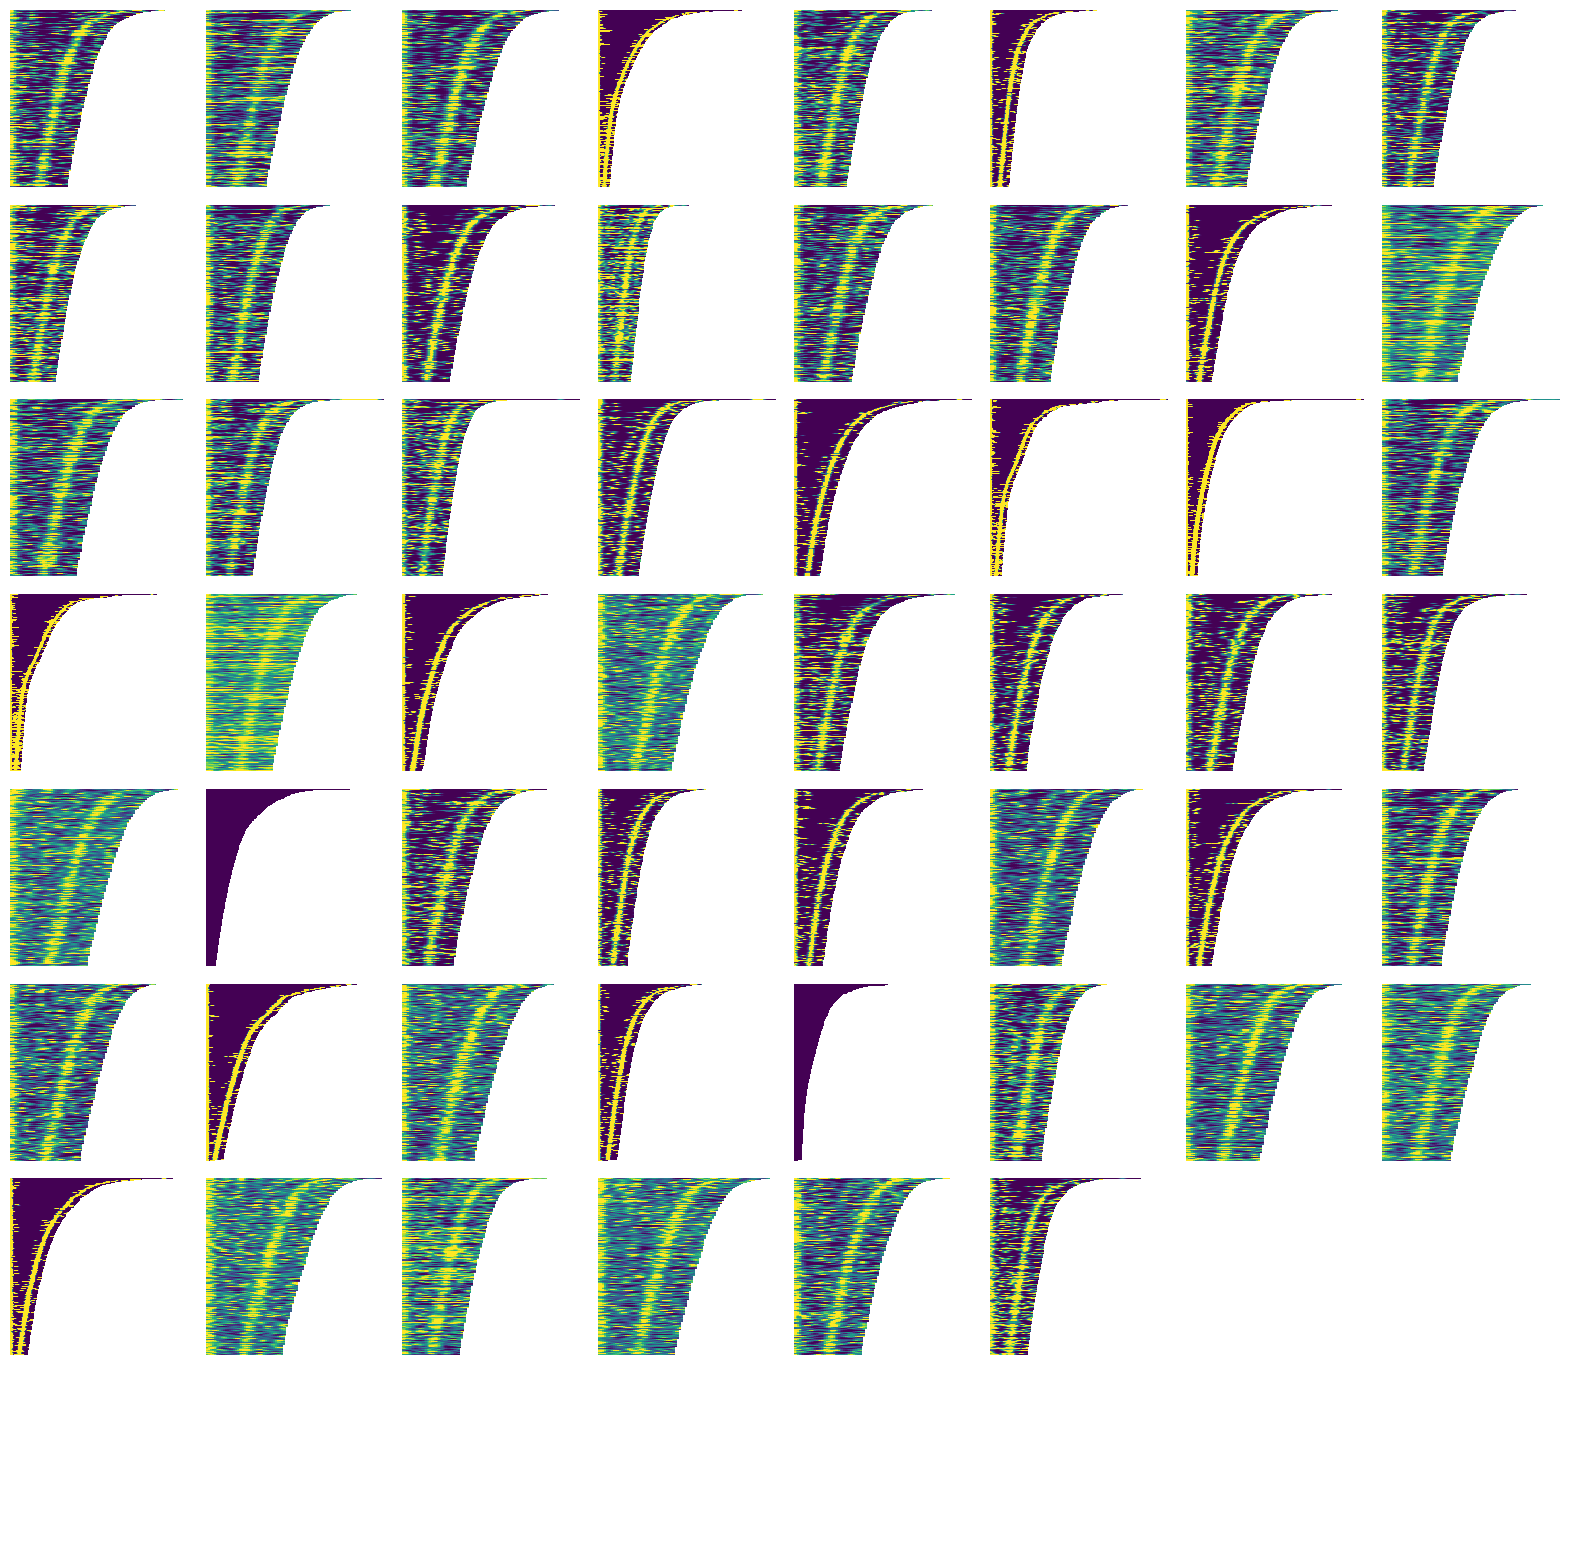

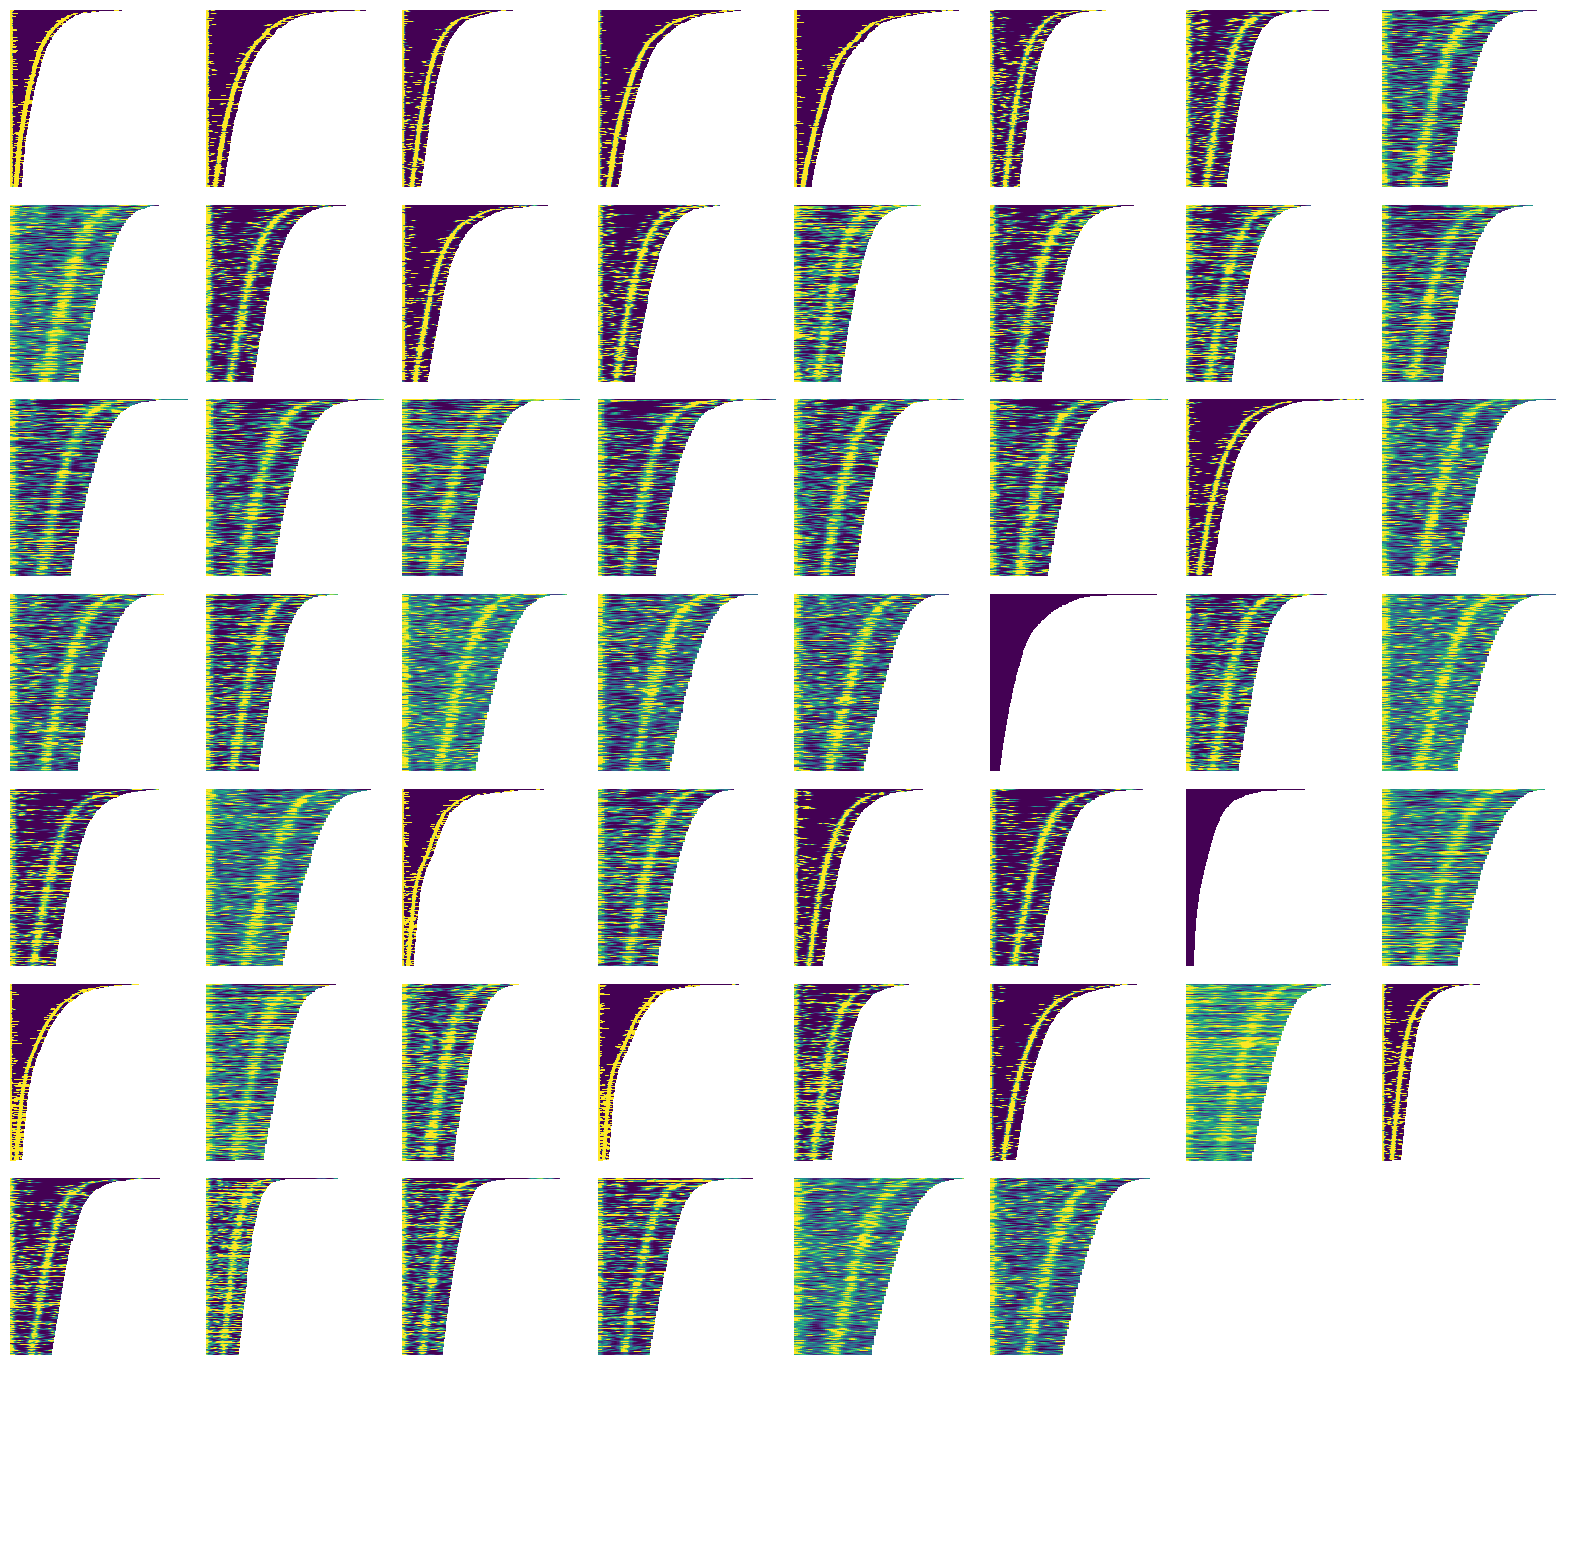

In [4]:
vr_session_base_names = ["M20_D25_2024-05-27_14-24-21_VR1"]
of_session_base_names = ["M20_D25_2024-05-27_13-57-19_OF1"]
spike_data = get_data(vr_session_base_names, of_session_base_names)

col = "grid_score"
#col = "spatial_information_score_Isec"
#col = "unit_location_y"

spike_data = spike_data.sort_values(by=[col], ascending=False)
#plot_rate_map_relative_to_field(spike_data, reorder=True)
plot_all_rate_map_relative_to_field(spike_data, reorder=True)


col = "unit_location_y"
spike_data = spike_data.sort_values(by=[col], ascending=False)
#plot_rate_map_relative_to_field(spike_data, reorder=True)
plot_all_rate_map_relative_to_field(spike_data, reorder=True)

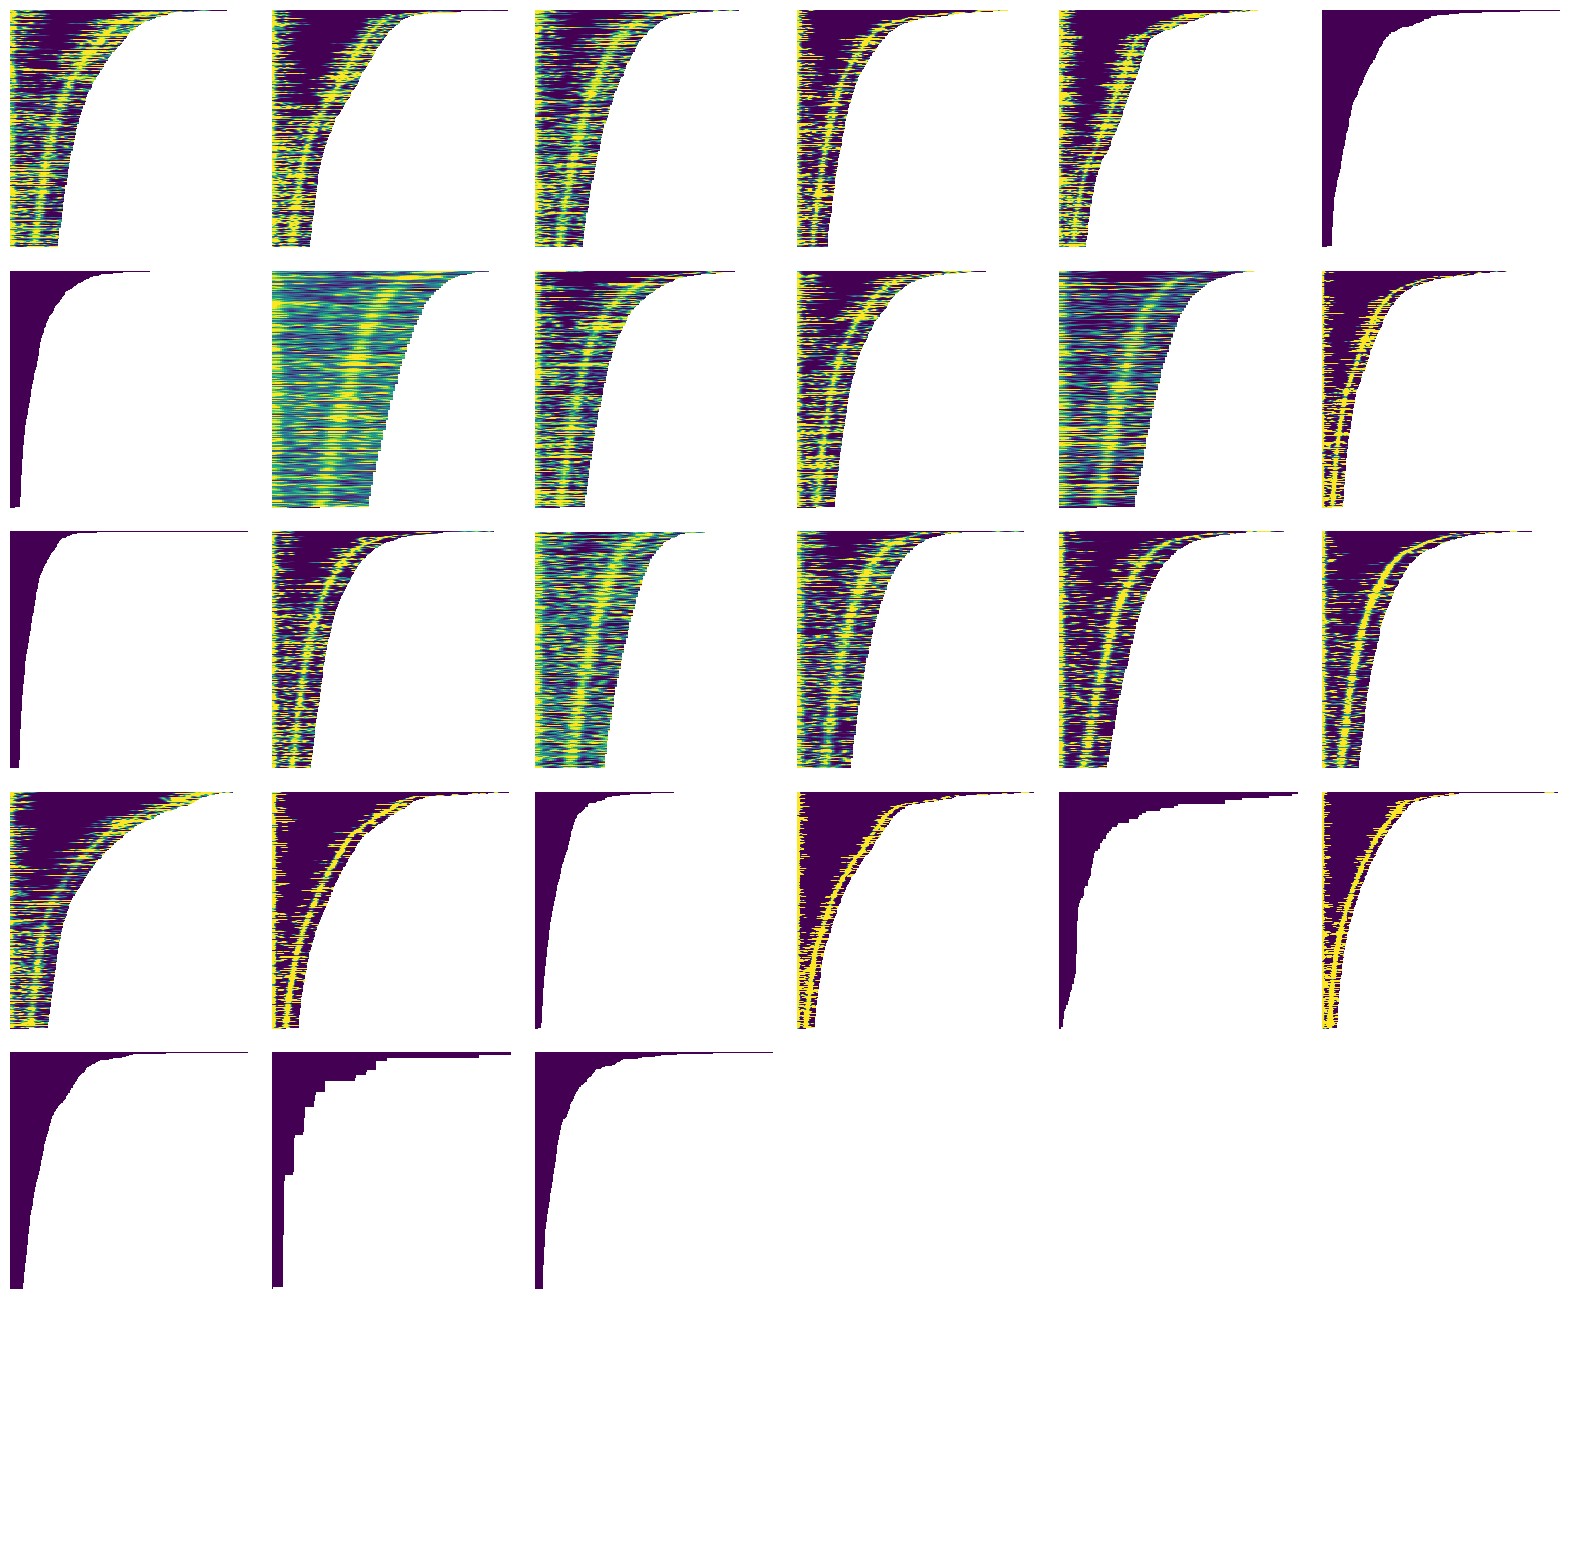

In [5]:
vr_session_base_names = ["M11_D36_2021-06-28_12-04-36"]
of_session_base_names = ["M11_D36_2021-06-28_11-19-21"]
project_path = "/mnt/datastore/Harry/Cohort8_may2021/"
master_data = pd.DataFrame()
for vr_name, of_name in zip(vr_session_base_names, of_session_base_names):
    mouse = vr_name.split("_")[0]
    day = vr_name.split("_")[1]
    vr_path = f"{project_path}/vr/{vr_name}/MountainSort/DataFrames/spatial_firing.pkl"
    of_path = f"{project_path}/of/{of_name}/MountainSort/DataFrames/spatial_firing.pkl"
    spike_data_vr = pd.read_pickle(vr_path); spike_data_vr["firing_times_vr"] = spike_data_vr["firing_times"]
    spike_data_of = pd.read_pickle(of_path)
    spike_data = pd.merge(spike_data_vr, spike_data_of, on="cluster_id")
    
    position_path =           f"{project_path}/vr/{vr_name}/MountainSort/DataFrames/position_data.pkl"
    processed_position_path = f"{project_path}/vr/{vr_name}/MountainSort/DataFrames/processed_position_data.pkl"
    position_data = pd.read_pickle(position_path)
    processed_position_data = pd.read_pickle(processed_position_path)
    spike_data = calculate_spatial_information(spike_data, position_data, track_length=200)
    master_data = pd.concat([master_data, spike_data], ignore_index=True)

col = "grid_score"
master_data = master_data.sort_values(by=[col], ascending=False)
#plot_rate_map_relative_to_field(spike_data, reorder=True)
plot_all_rate_map_relative_to_field(spike_data, reorder=True)